In [1]:
import retinanalysis as ra
import pandas as pd
import numpy as np
# import xarray as xr
ra.settings.mea_config
# ra.database_pop.reload_celltypefiles()

[2025-07-02 14:48:17,966][INFO]: Connecting root@127.0.0.1:3306
[2025-07-02 14:48:18,081][INFO]: Connected root@127.0.0.1:3306


{'data': '/Volumes/data-1/data/sorted',
 'analysis': '/Volumes/data-1/analysis',
 'h5': '/Volumes/data-1/data/h5',
 'meta': '/Volumes/data-1/datajoint_testbed/mea/meta',
 'tags': '/Volumes/data-1/datajoint_testbed/mea/tags',
 'user': 'vyomr'}

In [8]:
ra.database_utils.populate_database()

Need to convert /Volumes/data-1/data/h5/20230706C.h5 to json
going to implement this eventually
Need to convert /Volumes/data-1/data/h5/2023-07-13.h5 to json
going to implement this eventually
Need to convert /Volumes/data-1/data/h5/20231003C_old.h5 to json
going to implement this eventually
Need to convert /Volumes/data-1/data/h5/test.h5 to json
going to implement this eventually
Need to convert /Volumes/data-1/data/h5/20240117C_old.h5 to json
going to implement this eventually
Need to convert /Volumes/data-1/data/h5/20240514C.h5 to json
going to implement this eventually
Need to convert /Volumes/data-1/data/h5/20220329C_mouse.h5 to json
going to implement this eventually
Need to convert /Volumes/data-1/data/h5/20220405C_mouse.h5 to json
going to implement this eventually
Need to convert /Volumes/data-1/data/h5/20240418C.h5 to json
going to implement this eventually
Need to convert /Volumes/data-1/data/h5/20240718C.h5 to json
going to implement this eventually
Need to convert /Volumes

 60%|██████    | 77/128 [00:00<00:00, 296.01it/s]

Already in database: 20230406C
Already in database: 20230614C
Already in database: 20230629C
Already in database: 20230713C
Already in database: 20230719C
Already in database: 20240418H
Already in database: 20220406C
Already in database: 20220412C
Already in database: 20220420C
Already in database: 20220426C
Already in database: 20220518C
Already in database: 20220526C
Already in database: 20220531C
Already in database: 20220607C
Already in database: 20220705C
Already in database: 20220712C
Already in database: 20220726C
Already in database: 20220809C
Already in database: 20220816C
Already in database: 20220818C
Already in database: 20220823C
Already in database: 20220829C
Already in database: 20220909C
Already in database: 20221006C
Already in database: 20221024C
Already in database: 20221101C
Already in database: 20221114C
Already in database: 20221117C
Already in database: 20221123C
Already in database: 20221216C
Already in database: 20221219C
Already in database: 20221228C
Already 

 91%|█████████▏| 117/128 [00:00<00:00, 335.36it/s]

Already in database: 20240215C
Already in database: 20240229C
Already in database: 20240319H
Already in database: 20240326C
Already in database: 20240328C
Already in database: 20240328H
Already in database: 20240401C
Already in database: 20240401H
Already in database: 20240409C
Already in database: 20240424C
Already in database: 20240424H
Already in database: 20240523C
Already in database: 20240606H
Already in database: 20240611H
Already in database: 20240618H
Already in database: 20240620C
Already in database: 20240627C
Already in database: 20240627H
Already in database: 20240717H
Already in database: 20240717C
Already in database: 20240718H
Already in database: 20240801C
Already in database: 20240806C
Already in database: 20240806H
Already in database: 20240813H
Already in database: 20240813C
Already in database: 20240820C
Already in database: 20240926H
Already in database: 20240926C
Already in database: 20241010H
Already in database: 20241016C
Already in database: 20241121C
Already 

 95%|█████████▌| 122/128 [00:59<00:05,  1.12it/s] 

Adding /Volumes/data-1/datajoint_testbed/mea/meta/20250429H.json
Adding analysis for experiment 137, 20250429H
Could not find data directory for experiment 20250429H


 96%|█████████▌| 123/128 [01:48<00:09,  1.94s/it]

Adding /Volumes/data-1/datajoint_testbed/mea/meta/20250514C.json
Adding analysis for experiment 138, 20250514C
Looking in /Volumes/data-1/data/sorted/20250514C
ERROR: could not find a chunk for this data directory: 20250514C/data013


 97%|█████████▋| 124/128 [03:01<00:16,  4.02s/it]

Adding /Volumes/data-1/datajoint_testbed/mea/meta/20250527C.json
Adding analysis for experiment 139, 20250527C
Looking in /Volumes/data-1/data/sorted/20250527C


 98%|█████████▊| 125/128 [03:39<00:16,  5.40s/it]

Adding /Volumes/data-1/datajoint_testbed/mea/meta/20250529C.json
Adding analysis for experiment 140, 20250529C
Looking in /Volumes/data-1/data/sorted/20250529C


 98%|█████████▊| 126/128 [04:28<00:15,  7.77s/it]

Adding /Volumes/data-1/datajoint_testbed/mea/meta/20250530C.json
Adding analysis for experiment 141, 20250530C
Looking in /Volumes/data-1/data/sorted/20250530C


 99%|█████████▉| 127/128 [04:50<00:08,  8.81s/it]

Adding /Volumes/data-1/datajoint_testbed/mea/meta/20250626H.json
Adding analysis for experiment 142, 20250626H
Looking in /Volumes/data-1/data/sorted/20250626H


100%|██████████| 128/128 [31:52<00:00, 14.94s/it] 


In [10]:
df = ra.get_datasets_from_protocol_names('matfiles')
df.tail()


Found 1 protocols matching "matfiles":
['edu.washington.riekelab.protocols.PresentMatFiles']

Found 1 experiments, 1 epoch blocks.



,exp_name,datafile_name,NDF,chunk_name,protocol_name,is_mea,data_dir,group_label,experiment_id,protocol_id,group_id,block_id,chunk_id
0,20250514C,data003,0.5,movies_images,edu.washington.riekelab.protocols.PresentMatFiles,1,20250514C/data003,PresentMatFiles,138,77,2440,3662,502


In [ ]:
ra.Epoch

In [6]:
# import sys
# sys.path.append('/Users/riekelabbackup/Desktop/Vyom/RetinAnalysis/src/retinanalysis/')
# import response
# import importlib
# importlib.reload(response)

In [ ]:
idxs = [0]
s1 = ra.StimBlock(df.at[idxs[0], 'exp_name'], df.at[idxs[0], 'datafile_name'])
r1 = response.ResponseBlock(df.at[idxs[0], 'exp_name'], df.at[idxs[0], 'datafile_name'])
ac1 = ra.AnalysisChunk(df.at[idxs[0], 'exp_name'], s1.nearest_noise_chunk)

# pp = ra.MEAPipeline(s1, r1, ac1)
# qc1 = ra.qc.MEAQC(pp.response_block, ac1, pp.match_dict)

Loading VCD from /Volumes/data-1/analysis/20250514C/chunk1/kilosort2.5 ...
VCD loaded with 781 cells.


In [10]:
r1.bin_spike_times_by_frames()

Binning spikes for cells: 100%|██████████| 1104/1104 [00:13<00:00, 84.10it/s]


Mean frame rate: 59.95 Hz


In [11]:
r1.bin_rate, r1.mean_frame_rate

(59.94154881781792, 59.948032665181884)

In [13]:
r1.binned_spikes.shape

(1104, 102, 330)

In [14]:
s1.df_epochs

,barWidthPix,contrast,temporalFrequency,spatialFreq,barWidth,exp_name,datafile_name,group_label,protocol_name,frame_times_ms,epoch_parameters,data_dir,preTime,stimTime,tailTime,experiment_id,group_id,block_id,protocol_id,epoch_id
epoch_index,,,,,,,,,,,,,,,,,,,,
0,6,0.45,1,95.00000,20,20250307C,data032,CRF Grid Pattern Mode 15min,edu.washington.riekelab.vyom.protocols.Contras...,"[0, 17, 34, 50, 67, 84, 100, 117, 134, 150, 16...","{'NDF': 0.5, 'amp': 'Amp1', 'ndfs': '[]', 'pre...",20250307C/data032,250,5000,250,124,2259,3403,73,234949
1,6,1.00,1,95.00000,20,20250307C,data032,CRF Grid Pattern Mode 15min,edu.washington.riekelab.vyom.protocols.Contras...,"[0, 17, 34, 50, 67, 84, 100, 117, 134, 150, 16...","{'NDF': 0.5, 'amp': 'Amp1', 'ndfs': '[]', 'pre...",20250307C/data032,250,5000,250,124,2259,3403,73,234950
2,6,0.45,3,95.00000,20,20250307C,data032,CRF Grid Pattern Mode 15min,edu.washington.riekelab.vyom.protocols.Contras...,"[0, 17, 34, 50, 67, 84, 100, 117, 134, 150, 16...","{'NDF': 0.5, 'amp': 'Amp1', 'ndfs': '[]', 'pre...",20250307C/data032,250,5000,250,124,2259,3403,73,234951
3,6,1.00,3,95.00000,20,20250307C,data032,CRF Grid Pattern Mode 15min,edu.washington.riekelab.vyom.protocols.Contras...,"[0, 17, 34, 50, 67, 84, 100, 117, 134, 150, 16...","{'NDF': 0.5, 'amp': 'Amp1', 'ndfs': '[]', 'pre...",20250307C/data032,250,5000,250,124,2259,3403,73,234952
4,6,0.45,9,95.00000,20,20250307C,data032,CRF Grid Pattern Mode 15min,edu.washington.riekelab.vyom.protocols.Contras...,"[0, 17, 34, 50, 67, 84, 100, 117, 134, 150, 16...","{'NDF': 0.5, 'amp': 'Amp1', 'ndfs': '[]', 'pre...",20250307C/data032,250,5000,250,124,2259,3403,73,234953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,47,0.45,9,12.12766,160,20250307C,data032,CRF Grid Pattern Mode 15min,edu.washington.riekelab.vyom.protocols.Contras...,"[0, 17, 34, 50, 67, 84, 100, 117, 134, 150, 16...","{'NDF': 0.5, 'amp': 'Amp1', 'ndfs': '[]', 'pre...",20250307C/data032,250,5000,250,124,2259,3403,73,235046
98,47,1.00,9,12.12766,160,20250307C,data032,CRF Grid Pattern Mode 15min,edu.washington.riekelab.vyom.protocols.Contras...,"[0, 17, 34, 50, 67, 84, 100, 117, 134, 150, 16...","{'NDF': 0.5, 'amp': 'Amp1', 'ndfs': '[]', 'pre...",20250307C/data032,250,5000,250,124,2259,3403,73,235047
99,47,0.45,27,12.12766,160,20250307C,data032,CRF Grid Pattern Mode 15min,edu.washington.riekelab.vyom.protocols.Contras...,"[0, 17, 34, 50, 67, 84, 100, 117, 134, 150, 16...","{'NDF': 0.5, 'amp': 'Amp1', 'ndfs': '[]', 'pre...",20250307C/data032,250,5000,250,124,2259,3403,73,235048


In [15]:
r1.df_spike_times.head()

,spike_times,binned_spikes
cell_id,,
1,"[[87.9, 123.5, 534.15, 1482.75, 1511.7, 1520.6...","[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0,..."
129,"[[145.1, 164.89999999999998, 245.5, 1470.1, 23...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,..."
130,"[[157.25, 177.55, 228.5, 2079.45, 2133.15, 219...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,"[[], [], [], [], [], [], [], [], [], [], [], [...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
131,"[[76.75, 2169.6499999999996, 2794.049999999999...","[[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,..."


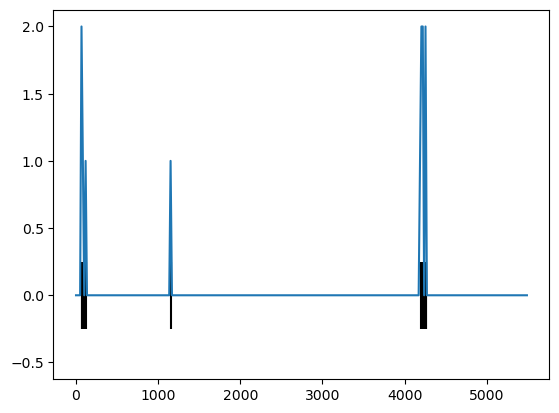

In [18]:
import matplotlib.pyplot as plt
cell_idx = 12
cell_id = r1.df_spike_times.index[cell_idx]
sts = r1.df_spike_times.loc[cell_id, 'spike_times']
# for i in range(r1.n_epochs):
    # plt.eventplot(sts[i], lineoffsets=i, linelengths=0.5, colors='black')
i = 0
plt.eventplot(sts[i], lineoffsets=i, linelengths=0.5, colors='black')
plt.plot(r1.binned_time, r1.binned_spikes[cell_idx, i])

In [76]:
np.corrcoef([np.nan, 1, 4], [0, 3, 6])

array([[nan, nan],
       [nan,  1.]])

In [2]:
sys.path.append('/Users/riekelabbackup/Desktop/Vyom/RetinAnalysis/src/retinanalysis/')
import ei_utils as eiu
import importlib
importlib.reload(eiu)

NameError: name 'sys' is not defined

In [3]:
cell_idx = 1
cell_id = r1.df_spike_times.index[cell_idx]
eiu.plot_ei_map(cell_id, r1.vcd)

NameError: name 'r1' is not defined